In [2]:
from astropy import coordinates,units,constants
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

In [3]:
## load all satellite galaxies
data = ascii.read("./Drlica-Wagner2020.txt")

## let's calculate the angular size of these galaxies ---## oops they're actually in the column ah
distance=np.array(data['D'])## distance of these galaxies in kpc


### Crab pulsar let's say 1kJy for a reasonable example?
crabgp=1000*units.Jy 


crab=(7175*units.lightyear).to(units.kpc)
crab_pf=14*units.mJy.to(units.Jy)

vela_pf=1100*units.mJy.to(units.Jy)
vela=0.28*units.kpc

mockcrab=crabgp*crab**2/(distance*units.kpc)**2
print('Crab GP at 10kpc:',crabgp*crab**2/(10*units.kpc)**2)

data.add_column(col=mockcrab,name='Example Crab GP luminosity')
print (data) ## if you want to have a look at the whole table

Crab GP at 10kpc: 48.394060201105525 Jy
       Name       Survey Class  RAdeg   ...  VMag Ref Example Crab GP luminosity
                                 deg    ...  mag                  Jy            
----------------- ------ ----- -------- ... ----- --- --------------------------
        Antlia II     --     4 143.8868 ... -9.03   1        0.27774368802287375
      Aquarius II    PS1     4 338.4813 ...  -4.4   2         0.4149010648242929
         Bootes I    PS1     4   210.02 ... -6.02   3          1.110974752091495
        Bootes II    PS1     4 209.5141 ... -2.94   3          2.743427449042263
       Bootes III    PS1     4    209.3 ... -5.75   4         2.1907677773248313
        Bootes IV    PS1     3  233.689 ... -4.53   5        0.11078972597034299
 Canes Venatici I    PS1     4 202.0091 ...  -8.8   3           0.10183078066052
Canes Venatici II    PS1     4 194.2927 ... -5.17   3        0.18903929766056846
           Carina     --     4 100.4065 ... -9.43   3         0.43894

In [4]:
data[data['Name']=='Sagittarius II']

Name,Survey,Class,RAdeg,DEdeg,m-M,ah,l_e,e,D,r1/2,VMag,Ref,Example Crab GP luminosity
,,,deg,deg,mag,arcmin,,,kpc,pc,mag,,Jy
str17,str8,int32,float64,float64,float64,float64,str1,float64,int32,int32,float64,str6,float64
Sagittarius II,PS1,4,298.1647,-22.0651,19.2,1.6,<,0.1,69,32,-5.2,22,1.0164683932179273


In [7]:
### filter parkes sample
##parkes dec -32.99839
pks_targets=data[(data['DEdeg']<(-32.99839+90-30.25))*(data['Class']==4)]
print(pks_targets)

     Name      Survey Class ...  VMag   Ref   Example Crab GP luminosity
                            ...  mag                      Jy            
-------------- ------ ----- ... ------ ------ --------------------------
     Antlia II     --     4 ...  -9.03      1        0.27774368802287375
   Aquarius II    PS1     4 ...   -4.4      2         0.4149010648242929
      Bootes I    PS1     4 ...  -6.02      3          1.110974752091495
     Bootes II    PS1     4 ...  -2.94      3          2.743427449042263
        Carina     --     4 ...  -9.43      3         0.4389483918467621
     Carina II     --     4 ...   -4.5      6         3.7341095834186357
    Carina III     --     4 ...   -2.4      6          6.172711760345092
Coma Berenices    PS1     4 ...  -4.38      3          2.499693192205864
     Crater II    PS1     4 ...   -8.2     11        0.35352516766093595
   Eridanus II    DES     4 ...  -7.21      3        0.03351389210602875
           ...    ...   ... ...    ...    ...      

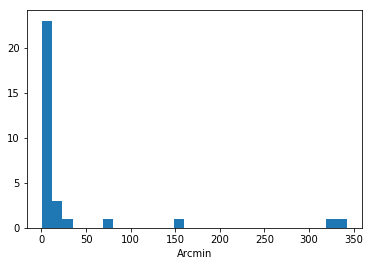

In [9]:
plt.hist(pks_targets['ah'],bins=30)
plt.xlabel("Arcmin")
plt.show()

In [5]:
###radiometer equation
def radiofunc(sigma,tsys,tsky,G,B,tobs):
    return (sigma*(tsys+tsky))/(G*np.sqrt(2*B*tobs))
### an sefd way of estimation
def sefd_rms(sigma,sefd,tobs,b):
    return (sefd/np.sqrt(tobs*b)*sigma)

tsky=7 ###kelvin
###askap
craft_sefd=2000
craft_b=336e6
tobs=5e-3
print("CRAFT")
print(sefd_rms(10,craft_sefd,tobs,craft_b))
print(sefd_rms(10,craft_sefd,tobs*55861,craft_b))
###utmost
utmost_sefd=120
utm_b=31.25e6
tobs=5e-3
print("utmost")
print(sefd_rms(10,utmost_sefd,tobs,utm_b))

###parkes telescope param
pks_tsys=21
pks_g=1.36
pks_sefd=29
pks_b=350e6 ###Hz
tobs=1e-3 ###width or integration time ##seconds
print("Parkes Radio Telescope")
pks_sens=radiofunc(10,pks_tsys,tsky,pks_g,pks_b,tobs)
print(pks_sens,"Jy")
print(sefd_rms(10,pks_sefd,tobs,pks_b))
#####GBT
gbt_tsys=20
gbt_g=2.0
gbt_b=650e6
print("Green Bank Telescope")
gbt_sens=radiofunc(10,gbt_tsys,tsky,gbt_g,gbt_b,tobs)
print(gbt_sens,"Jy")


#####Arecibo
alfa_tsys=30
alfa_g=10
alfa_b=100e6
print("Arecibo L-band Feed Array")
alfa_sens=radiofunc(10,alfa_tsys,tsky,alfa_g,alfa_b,tobs)
print(alfa_sens,"Jy")


CRAFT
15.430334996209192
0.06528614147578675
utmost
3.035786553761644
Parkes Radio Telescope
0.24607647839237515 Jy
0.4901894677425396
Green Bank Telescope
0.11840283260644895 Jy
Arecibo L-band Feed Array
0.08273451516749221 Jy
